# 🗒️ O Danych

Dane o pasażerach Titanica

Zbiór danych zawiera informacje o pasażerach RMS Titanic, który zatonął 15 kwietnia 1912 roku po zderzeniu z górą
lodową. Dane obejmują takie atrybuty jak klasa podróży, wiek, płeć, liczba rodzeństwa/małżonków na pokładzie,
liczba rodziców/dzieci na pokładzie, cena biletu oraz miejsce zaokrętowania.

Zbiór zawiera także informację o tym, czy pasażer przeżył katastrofę.

Titanic przewoził ponad 2,200 osób, z czego ponad 1,500 zginęło, co czyni tę katastrofę jedną z najbardziej
tragicznych w historii morskiej.

Kolumny:

* **pclass** - Klasa biletu
* **survived** - Czy pasażer przeżył katastrofę
* **name** - Imię i nazwisko pasażera
* **sex** - Płeć pasażera
* **age** - Wiek pasażera
* **sibsp** - Liczba rodzeństwa/małżonków na pokładzie
* **parch** - Liczba rodziców/dzieci na pokładzie
* **ticket** - Numer biletu
* **fare** - Cena biletu
* **cabin** - Numer kabiny
* **embarked** - Port, w którym pasażer wszedł na pokład (C = Cherbourg, Q = Queenstown, S = Southampton)
* **boat** - Numer łodzi ratunkowej
* **body** - Numer ciała (jeśli pasażer nie przeżył i ciało zostało odnalezione)
* **home.dest** - Miejsce docelowe

# 🎯 Cel analizy:

Celem analizy było lepsze zrozumienie czynników, które mogły mieć wpływ na przeżywalność pasażerów Titanica. Skupiono się na ogólnym poziomie śmiertelności oraz jego zróżnicowaniu w zależności od takich cech jak:
- płeć,
- wiek, 
- klasa biletu
- obecność członków rodziny na pokładzie.  

Analiza miała na celu uchwycenie ewentualnych zależności i wzorców, które mogły zwiększać lub zmniejszać szanse przetrwania w czasie katastrofy.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

from scipy.stats import norm
pd.options.display.max_columns = None

from IPython.display import Markdown

In [2]:
df = pd.read_csv('26__titanic.csv', sep=",")
# df

# 🔍 KROK 1: Ogólny przegląd danych

### Podstawowe informacje o DataFrame

In [3]:
info_df = pd.DataFrame({
    'Kolumna': df.columns,
    'Typ danych': df.dtypes.values,
    'Wartości brakujące': df.isna().sum().values,
    'Unikalne': df.nunique().values
})


info_df

,Kolumna,Typ danych,Wartości brakujące,Unikalne
0,pclass,float64,1,3
1,survived,float64,1,2
2,name,object,1,1307
3,sex,object,1,2
4,age,float64,264,98
5,sibsp,float64,1,7
6,parch,float64,1,8
7,ticket,object,1,929
8,fare,float64,2,281
9,cabin,object,1015,186


In [4]:
num_columns = df.shape[1]
num_rows = df.shape[0]
Markdown(f"#### Number of columns: {num_columns} \n#### Numbers of rows: {num_rows}")

#### Number of columns: 14 
#### Numbers of rows: 1310

#### 10 samples

In [5]:
df.sample(10)

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
198,1.0,1.0,"Marvin, Mrs. Daniel Warner (Mary Graham Carmic...",female,18.0,1.0,0.0,113773,53.1000,D30,S,10,NaN,"New York, NY"
196,1.0,1.0,"Marechal, Mr. Pierre",male,NaN,0.0,0.0,11774,29.7000,C47,C,7,NaN,"Paris, France"
1207,3.0,0.0,"Skoog, Master. Karl Thorsten",male,10.0,3.0,2.0,347088,27.9000,NaN,S,NaN,NaN,NaN
213,1.0,1.0,"Newell, Miss. Madeleine",female,31.0,1.0,0.0,35273,113.2750,D36,C,6,NaN,"Lexington, MA"
855,3.0,0.0,"Hassan, Mr. Houssein G N",male,11.0,0.0,0.0,2699,18.7875,NaN,C,NaN,NaN,NaN
864,3.0,0.0,"Henriksson, Miss. Jenny Lovisa",female,28.0,0.0,0.0,347086,7.7750,NaN,S,NaN,NaN,NaN
604,3.0,1.0,"Abelseth, Miss. Karen Marie",female,16.0,0.0,0.0,348125,7.6500,NaN,S,16,NaN,"Norway Los Angeles, CA"
161,1.0,1.0,"Hogeboom, Mrs. John C (Anna Andrews)",female,51.0,1.0,0.0,13502,77.9583,D11,S,10,NaN,"Hudson, NY"
353,2.0,1.0,"Bryhl, Miss. Dagmar Jenny Ingeborg",female,20.0,1.0,0.0,236853,26.0000,NaN,S,12,NaN,"Skara, Sweden / Rockford, IL"
406,2.0,0.0,"Faunthorpe, Mr. Harry",male,40.0,1.0,0.0,2926,26.0000,NaN,S,NaN,286.0,"England / Philadelphia, PA"


### Wartości unkatowe

In [6]:
info_df = pd.DataFrame({
    'Kolumna': df.columns,
    'Typ danych': df.dtypes.values,
    'Nie-null': df.notnull().sum().values,
    'Unikalne': df.nunique().values
})

info_df

,Kolumna,Typ danych,Nie-null,Unikalne
0,pclass,float64,1309,3
1,survived,float64,1309,2
2,name,object,1309,1307
3,sex,object,1309,2
4,age,float64,1046,98
5,sibsp,float64,1309,7
6,parch,float64,1309,8
7,ticket,object,1309,929
8,fare,float64,1308,281
9,cabin,object,295,186


In [7]:
Markdown(f' #### Wartościi unikatowe łącznie **{df.nunique().sum()}**')

 #### Wartościi unikatowe łącznie **3343**

In [8]:
### Klasy biletów
n_unique_value_of_pclass = df['pclass'].nunique()

unique_value_of_pclass =  df['pclass'].unique()

Markdown(f' #### Istnieją **{n_unique_value_of_pclass}** klasy biletów \n Klasy biletów to: **{unique_value_of_pclass}**. \n"nan" jako wartości brakujące')

 #### Istnieją **3** klasy biletów 
 Klasy biletów to: **[ 1.  2.  3. nan]**. 
"nan" jako wartości brakujące

### Juz na tym etapie widzimy że istnieją barakujące dane

### ⚓ Porty w których dosiadali się pasa

In [9]:
n_unique_value_of_pclass = df['embarked'].nunique()

unique_value_of_embarked  =  df['embarked'].unique()

Markdown(f'#### Istniały {n_unique_value_of_pclass} porty, w których dosiadli się pasażerowie.\n#### Są to miasta portowe: {unique_value_of_embarked}C = Cherbourg, Q = Queenstown, S = Southampton\n#### "nan" to wartość brakująca')


#### Istniały 3 porty, w których dosiadli się pasażerowie.
#### Są to miasta portowe: ['S' 'C' nan 'Q']C = Cherbourg, Q = Queenstown, S = Southampton
#### "nan" to wartość brakująca

#### Już na tym etapie widzimy że dane będzie należało przetworzyć dane

In [10]:
unique_values = df['survived'].unique()

text = f"### 🔍 Unikalne wartości w kolumnie `survived`:\n\n"
text += f"Istnieją wartości: {list(unique_values)} oznaczające czy pasażer przeżył katastrofę.\n\n"

for value in unique_values:
    if value == 0:
        text += f"- Wartość **{int(value)}** oznacza **nie przeżył**.\n"
    elif value == 1:
        text += f"- Wartość **{int(value)}** oznacza **przeżył**.\n"
    elif pd.isna(value):
        text += f"- Wartość **NaN** oznacza **brak danych**.\n"

Markdown(text)

### 🔍 Unikalne wartości w kolumnie `survived`:

Istnieją wartości: [1.0, 0.0, nan] oznaczające czy pasażer przeżył katastrofę.

- Wartość **1** oznacza **przeżył**.
- Wartość **0** oznacza **nie przeżył**.
- Wartość **NaN** oznacza **brak danych**.


### Podstawowe statystyki opisowe

In [11]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
pclass,1309.0,2.294882,0.837836,1.0000,2.0000,3.0000,3.000,3.0000
survived,1309.0,0.381971,0.486055,0.0000,0.0000,0.0000,1.000,1.0000
age,1046.0,29.881135,14.413500,0.1667,21.0000,28.0000,39.000,80.0000
sibsp,1309.0,0.498854,1.041658,0.0000,0.0000,0.0000,1.000,8.0000
parch,1309.0,0.385027,0.865560,0.0000,0.0000,0.0000,0.000,9.0000
fare,1308.0,33.295479,51.758668,0.0000,7.8958,14.4542,31.275,512.3292
body,121.0,160.809917,97.696922,1.0000,72.0000,155.0000,256.000,328.0000


Już na tym etapie widzimy że:
- wśród klasy biletu przeważa 3 klasa biletu.
- większość osób jest tóż przed 30 rokiem zycia.

## ✅ Podsumowanie ogólnego przeglądu danych o pasażerach Titanica

### Dane posiadają:

1310 wierszy

14 kolumn:
- 7 z danymi tekstowymi (object)
- 7 z danymi zmiennoprzecinkowymi (float64)


- 3343 wartości unikatowych.
- 3869 wartości brakujących.
- Każda kolumna zawiera przynajmniej jedną brakującą wartość.

# ❓ KROK 2: Analiza brakujących wartości.

### Wartości brakujące

In [12]:
missing_values = df.isnull().sum()

missing_df = pd.DataFrame({
    'Column': missing_values.index,
    'Missing Values': missing_values.values
})

missing_df

,Column,Missing Values
0,pclass,1
1,survived,1
2,name,1
3,sex,1
4,age,264
5,sibsp,1
6,parch,1
7,ticket,1
8,fare,2
9,cabin,1015


In [13]:
Markdown(f'#### Liczba wszystkich brakujących wartości: {df.isnull().sum().sum()}')

#### Liczba wszystkich brakujących wartości: 3869

### Skopiowanie DataFrame w celu bezpiecznej naprawy danych

In [14]:
df_copy = df.copy()

## Analiza poszczególnych kolumn w celu szukania poszególnych brakujących wartości

### Poszukiwanie duplikatów

In [15]:
df_copy.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
1305    False
1306    False
1307    False
1308    False
1309    False
Length: 1310, dtype: bool

### Szukanie brakującej danej w pclass - Klasa biletu

In [16]:
nan_row_in_pclass = df_copy[df_copy['pclass'].isna()]
nan_row_in_pclass

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
1309,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Cały wiersz zawiera danych - **do usunięcia**

In [17]:
df_copy.dropna(subset=['pclass'],inplace=True)

In [18]:
missing_values_copy = df_copy.isnull().sum()

missing_df_copy = pd.DataFrame({
    'Column': missing_values_copy.index,
    'Missing Values': missing_values_copy.values
})

missing_df_copy

,Column,Missing Values
0,pclass,0
1,survived,0
2,name,0
3,sex,0
4,age,263
5,sibsp,0
6,parch,0
7,ticket,0
8,fare,1
9,cabin,1014


### Szukanie brakujących danych w 'age' - wiek pasażerów

In [19]:
missing_values_in_age_column = df_copy['age'].isnull().sum()
Markdown(f'Brakujące wartości w kolumnie "age": {missing_values_in_age_column}')

Brakujące wartości w kolumnie "age": 263

#### Wypełnienie **śrdnią wartością** brakujących wartości w kolumnie **"age"**.

In [20]:
df_copy.fillna({ 'age': df_copy['age'].mean()}, inplace = True )

In [21]:
# missing_values_copy = df_copy.isnull().sum()

# missing_df_copy = pd.DataFrame({
#     'Column': missing_values_copy.index,
#     'Missing Values': missing_values_copy.values
# })

# missing_df_copy

### Szukanie brakującej danej w **fare** - Cena biletu

In [22]:
nan_row_in_fare = df_copy[df_copy['fare'].isna()]

nan_row_in_fare

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
1225,3.0,0.0,"Storey, Mr. Thomas",male,60.5,0.0,0.0,3701,NaN,NaN,S,NaN,261.0,NaN


Widzimy że brakująca wartość 'fare' dotyczy jednego rekordu, posiadacza biletu 3 klasy.

Można uzupełnić wartość brakującą średnią wartością cen biletów 3-klasy

In [23]:
# Krok 1: Obliczenie średniej ceny biletu dla klasy 3 (pclass = 3)
mean_for_fare_pclass_3 = df_copy[df_copy['pclass'] == 3]['fare'].mean()
mean_for_fare_pclass_3

# Krok 2: Zastąpienie brakującego NAN 
# loc - bezpośrenia zmiana w df_copy
# (df_copy['pclass'] == 3 - warunek który bierze pod uwagę jedynie 3 klasę biletu
# (df_copy['fare'].isna()), 'fare' - zastąp NAN średnią ceną biletu
df_copy.loc[(df_copy['pclass'] == 3) & (df_copy['fare'].isna()), 'fare'] = mean_for_fare_pclass_3


In [24]:
# df_copy.isnull().sum()

### Analiza brakujących danej w **cabin** - numer kabiny.

In [25]:
df_copy['cabin'].info()

<class 'pandas.core.series.Series'>
Index: 1309 entries, 0 to 1308
Series name: cabin
Non-Null Count  Dtype 
--------------  ----- 
295 non-null    object
dtypes: object(1)
memory usage: 20.5+ KB


#### W kolumnie znajdują się jedynie wartości **tekstowe**

In [26]:
# Ilość brakujących danych dotyczących kabin
cabin_mising_values = df_copy['cabin'].isnull().sum()
# Ilość wszystkich wierszy
num_rows_in_df_copy = len(df_copy.index)
# Różnica ilości wierszy z brakującymi danymi 'cabin' od wszyskich wierszy
num_of_cabins_data_left = num_rows_in_df_copy - cabin_mising_values
# % jaki mają wiersze z brakującymi danymi
percent_of_mining_cabin_data = ((cabin_mising_values*100)/num_rows_in_df_copy).round(2)

Markdown(f"""
#### Istnieje {cabin_mising_values} brakujących wartości w kolumnie *cabin*  
#### Istnieje wszystkich {num_rows_in_df_copy} rekordów  
#### Pozostaje {num_of_cabins_data_left} wartości kabin  
#### Procent zaginionych danych dotyczących kabiny to {percent_of_mining_cabin_data}%
""")



#### Istnieje 1014 brakujących wartości w kolumnie *cabin*  
#### Istnieje wszystkich 1309 rekordów  
#### Pozostaje 295 wartości kabin  
#### Procent zaginionych danych dotyczących kabiny to 77.46%


#### Procent zaginionych rekordów dotyczących kabiny przekracza 75% można przyjąć że dane są utracone na zawsze i zaspąpić je wartością 'Unknow'

In [27]:
df_copy['cabin'] = df_copy['cabin'].fillna('Unknown')

In [28]:
# df_copy.isnull().sum()

### Analiza brakujących danej w **embarked** - Port, w którym pasażer wszedł na pokład

In [29]:
nan_row_in_embarked = df_copy[df_copy['embarked'].isna()]
nan_row_in_embarked

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
168,1.0,1.0,"Icard, Miss. Amelie",female,38.0,0.0,0.0,113572,80.0,B28,NaN,6,NaN,NaN
284,1.0,1.0,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0.0,0.0,113572,80.0,B28,NaN,6,NaN,"Cincinatti, OH"


Sprawdzenie, w którym porcie wsiadło najwięcej osób

In [30]:
from IPython.display import Markdown

# Wystąpienia wartości w kolumnie 'embarked'
common_ports = df_copy['embarked'].value_counts()

# Najczęściej występujący port
most_common_port = common_ports.idxmax()

# Tworzymy tekst Markdown
text = f"""
### ⚓ Analiza portów zaokrętowania (wszyscy pasażerowie)

Liczba pasażerów zaokrętowanych w poszczególnych portach:

{common_ports.to_frame().to_markdown()}

**Najczęściej występujący port:** `{most_common_port}`
"""

Markdown(text)



### ⚓ Analiza portów zaokrętowania (wszyscy pasażerowie)

Liczba pasażerów zaokrętowanych w poszczególnych portach:

| embarked   |   count |
|:-----------|--------:|
| S          |     914 |
| C          |     270 |
| Q          |     123 |

**Najczęściej występujący port:** `S`


Najwięcej pasażerów wsiadło w porcie Southampton, na tej podstawie można założyć że 2 brakujące wartoście w embarked można wypełnić nazwą portu S

Obie pasażerki było posiadaczkami biletów 1 klasy. Co prowadzi nas do spwawdzenie w kórym portcie wsiadło najwięcej pasażerów z 1 klasy

In [31]:
from IPython.display import Markdown

# Filtrujemy DataFrame, aby uzyskać tylko pasażerów z 1 klasy
first_class_passengers = df_copy[df_copy['pclass'] == 1]

# Grupujemy według kolumny 'embarked' i liczymy liczbę pasażerów
passengers_per_port = first_class_passengers['embarked'].value_counts()

# Najczęściej występujący port
most_passengers_port = passengers_per_port.idxmax()

# Tworzymy tekst Markdown
text = f"""
### 🚢 Analiza pasażerów 1 klasy według portu

Liczba pasażerów 1 klasy w zależności od portu zaokrętowania:

{passengers_per_port.to_frame().to_markdown()}

**Port z największą liczbą pasażerów 1 klasy:** `{most_passengers_port}`
"""

Markdown(text)




### 🚢 Analiza pasażerów 1 klasy według portu

Liczba pasażerów 1 klasy w zależności od portu zaokrętowania:

| embarked   |   count |
|:-----------|--------:|
| S          |     177 |
| C          |     141 |
| Q          |       3 |

**Port z największą liczbą pasażerów 1 klasy:** `S`


Najwięcej pasażerów 1 klasy wsiadło w porcie Southampton, na tej podstawie można założyć że 2 brakujące wartoście w embarked można wypełnić nazwą portu "Southampton"

In [32]:
df_copy['embarked'] = df_copy['embarked'].fillna('Southampton')
# df_copy.isna().sum()

### 🛶 Analiza brakujących danych w **boat** - numerze łodzi ratunkowej

In [33]:
col = 'boat'
total = len(df_copy)
non_null = df_copy[col].notnull().sum()
nulls = total - non_null
dtype = df_copy[col].dtype

pd.DataFrame({
    'Column': [col],
    'Data Type': [dtype],
    'Total Rows': [total],
    'Non-Null': [non_null],
    'Nulls': [nulls],
    'Null %': [round(nulls / total * 100, 2)],
})

,Column,Data Type,Total Rows,Non-Null,Nulls,Null %
0,boat,object,1309,486,823,62.87


#### Na podstawie informacji o kolumnie 'boat':
- Widzimy że zawierają się w niej dane tekstowe.
- Uważam że numer łodzi jest mało istotny.
- najlepiej zastąpić je "Unkown"
<!-- - nie mam pomysłu co z tym zrobić poza usunieciem lub zastąpieniem stringirm -->

#### Zastąpienie NAN stringiem 'Unkown'

In [34]:
df_copy['boat'] = df_copy['boat'].fillna('Unkonwn')

### Analiza brakujących danych w **home.dest** - destynacji pasarzerów
Analogicznie zastąpienie wartości brakujących tym razem "Dest. unkonw".

In [35]:
df_copy['home.dest'] = df_copy['home.dest'].fillna('Dest. unkown')

### Analiza kolumny **body** - numer odnalezionego ciała

In [36]:
survive_pass = df_copy[df_copy['survived'] == 1]
df_copy['body'].info()

<class 'pandas.core.series.Series'>
Index: 1309 entries, 0 to 1308
Series name: body
Non-Null Count  Dtype  
--------------  -----  
121 non-null    float64
dtypes: float64(1)
memory usage: 20.5 KB


#### Wszyskie rzędy w kolumnie **body** są liczbami zmienno przecinkowymi

In [37]:
from IPython.display import Markdown

exists_conflict = df_copy[(df_copy['survived'] == 1) & (df_copy['body'].notna())].shape[0] > 0

if exists_conflict:
    text = (
        "**⚠️ Uwaga!**\n\n"
        "Istnieje co najmniej jeden wiersz, w którym:\n\n"
        "- `survived` jest równy **1** (pasażer przeżył) oraz\n"
        "- kolumna `body` zawiera **nie-NaN** wartość.\n\n"
        "To może wskazywać na konflikt w danych."
    )
else:
    text = (
        "✅ Nie ma wierszy, w których:\n\n"
        "- `survived` jest równy **1** (pasażer przeżył) oraz\n"
        "- kolumna `body` zawiera wartość inną niż NaN."
    )

Markdown(text)


✅ Nie ma wierszy, w których:

- `survived` jest równy **1** (pasażer przeżył) oraz
- kolumna `body` zawiera wartość inną niż NaN.

Nie ma wiersza zawierającego konflikt logiczny że pasażer przeżył i jednocześnie posiada numer ciała

Postanowiłem nadać każedmu nieodnalezionemu wartość liczbową "0".
Są to wartości numeryczne. działając na liczbach moża wyciągnąć jakieś wnioski w przyszłości.

In [38]:
df_copy['body'] = df_copy['body'].fillna(0)
# df_copy.isna().sum()

In [39]:
missing_values_copy = df_copy.isnull().sum()

missing_df_copy = pd.DataFrame({
    'Column': missing_values_copy.index,
    'Missing Values': missing_values_copy.values
})

missing_df_copy

,Column,Missing Values
0,pclass,0
1,survived,0
2,name,0
3,sex,0
4,age,0
5,sibsp,0
6,parch,0
7,ticket,0
8,fare,0
9,cabin,0


## ✅ Podumowanie Analizy brakujących wartości:
1. Został usunięty wiersz, który nie posiadał żadnych wartości.
2. Liczba wszystkich brakujących wartości wynosiła: **3869**
3. Brakujące wartości w kolumnie **age** w liczbie: 263 - zostały zastąpione średnią
4. Brakująca jedna dana w kolumnie **fare** (Cena biletu), dotyczyła 1 biletu z 3 klasy została zastąpiona średniąz biledów 3 klasy
5. Brakujące numery kabin w kolumnie **cabin** w liczbie: 1014 - zostały zastąpione wartością "Unknow" ponieważ numery kabin były stringami.
6. W klasie 2 i 3 nie było żadnych danych dotyczących numerów kabin
7. Brakujące dane w ilości 2 w kolumnie **embarked** (Port, w którym pasażer wszedł na pokład) - została zastąpiona najczęściej używanym do tego celu porcie S, zarówno dla wszyskich pasażerów jak i dla posiadaczy 1 klasy, które posiadały osoby z brakującymi danymi.
8. Brakujące dane w **boat** (numerze łodzi ratunkowej) - również zostały zastąpione warością "Unkown"
9. Brakujące wartości w kolumnie **body** (numer odnalezionego ciała) - jako liczby float64 zostały zastąpione wartością liczbową "0"
10. Brak duplikatów

# KROK 📍 3: Analiza pojedyńczych zmiennych

Kopiowanie **df_copy** pod nazwą **df_eda** dla analizy poszczególnych kolumn.

In [40]:
df_eda = df_copy.copy()
# df_eda

## ⚰️ Analiza zgonów

In [41]:
# Liczba wszyskich pasażerów
num_of_passengers = df_eda.shape[0]
num_of_passengers_deaths = (df_eda['survived'] == 0 ).sum()
percent_of_total_death = ((num_of_passengers_deaths*100)/num_of_passengers).round(2)

Markdown(f'#### Całkowita liczba pasażerów: {num_of_passengers}  \n#### Całkowita liczba zgonów: {num_of_passengers_deaths}  \n#### Całkowity procent zgonów: {percent_of_total_death}%')


#### Całkowita liczba pasażerów: 1309  
#### Całkowita liczba zgonów: 809  
#### Całkowity procent zgonów: 61.8%

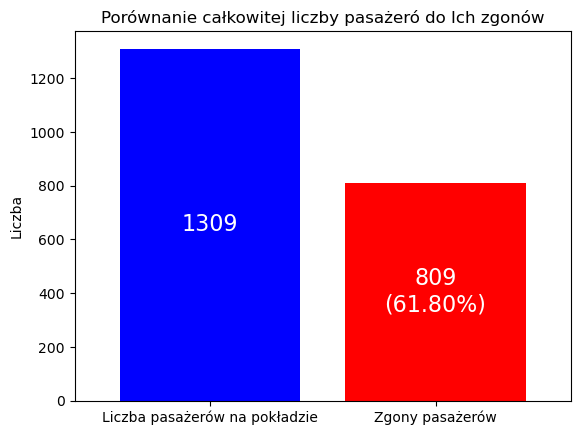

In [42]:
labels_t = ['Liczba pasażerów na pokładzie', 'Zgony pasażerów']
values_t = [num_of_passengers, num_of_passengers_deaths]

#procentowy udział zgonów Kobiet
#percent_of_total_death = ((num_of_passengers_deaths*100)/num_of_passengers).round(2)

fig, ax = plt.subplots()
bars = ax.bar(labels_t, values_t, color=['white', 'white'], width=1)

# Tworzenie wykresu słupkowego z szerokością słupków ustawioną na 1 (dotykające się słupki)
for bar in bars:
    yval = bar.get_height()  # wysokość słupka (wartość)
    if bar.get_x() == bars[1].get_x():  # Sprawdzenie, czy to słupek ze zgonami
        ax.text(bar.get_x() + bar.get_width()/2, yval/2, f'{int(yval)}\n({percent_of_total_death:.2f}%)', 
                ha='center', va='center', color='white', fontsize=16)
    else:  # Słupek dla ogólnej liczby Kobiet
        ax.text(bar.get_x() + bar.get_width()/2, yval/2, f'{int(yval)}', ha='center', va='center', color='white', fontsize=16)


# Tworzenie wykresu słupkowego
plt.bar(labels_t, values_t, color=['blue', 'red'])
#plt.xlabel('Category')
plt.ylabel('Liczba')
plt.title('Porównanie całkowitej liczby pasażeró do Ich zgonów')
plt.show()

## Analiza zgonów podług płci

In [43]:
num_of_m_f = df_eda['sex'].value_counts()

Markdown(f"""
### 🚻 Ilość mężczyzn i kobiet na pokładzie

{num_of_m_f.to_frame().to_markdown()}
""")


### 🚻 Ilość mężczyzn i kobiet na pokładzie

| sex    |   count |
|:-------|--------:|
| male   |     843 |
| female |     466 |


### Zgony  mężczyzn

In [44]:
#ilości mężczyzn i kobiet
idxmax_num_of_m_f = num_of_m_f.idxmax()

#liczba mężczyzn na pokładzie
men_in_total = df_eda[(df_eda['sex'] == 'male')].value_counts().sum()
#liczba % mężczyzn w populacji pasażerów
percent_of_men = ((men_in_total*100) / num_of_passengers).round(2)
#liczba śmierci mężczyzn
death_of_men = df_eda[(df_eda['sex'] == 'male') & (df_eda['survived'] == 0)].value_counts().sum()
#procent jaki stanową zmarli mężczyźni
percent_of_men_death = ((death_of_men*100)/men_in_total).round(2)
text = f"""
### 👨 Statystyki dotyczące mężczyzn na pokładzie

- Procent mężczyzn w populacji pasażerów: **{percent_of_men}%**  
- Całkowita liczba mężczyzn na pokładzie: **{men_in_total}**  
- Liczba zgonów mężczyzn: **{death_of_men}**  
- Zginęło **{percent_of_men_death}%** mężczyzn
"""

Markdown(text)


### 👨 Statystyki dotyczące mężczyzn na pokładzie

- Procent mężczyzn w populacji pasażerów: **64.4%**  
- Całkowita liczba mężczyzn na pokładzie: **843**  
- Liczba zgonów mężczyzn: **682**  
- Zginęło **80.9%** mężczyzn


### Zgony kobiet

In [45]:
women_in_total = df_eda[(df_eda['sex'] == 'female')].value_counts().sum()
#liczba śmierci mężczyzn
death_of_women = df_eda[(df_eda['sex'] == 'female') & (df_eda['survived'] == 0)].value_counts().sum()
#liczba % mężczyzn w populacji pasażerów
percent_of_women = ((women_in_total*100) / num_of_passengers).round(2)
#procent jaki stanową zmarli mężczyźni
percent_of_women_death = ((death_of_women*100)/women_in_total).round(2)
text = f"""
### 👩 Statystyki dotyczące kobiet na pokładzie

- Całkowita liczba kobiet na pokładzie: **{women_in_total}**  
- Procent kobiet w populacji pasażerów: **{percent_of_women}%**  
- Liczba zgonów kobiet: **{death_of_women}**  
- Zginęło: **{percent_of_women_death}%** kobiet
"""

Markdown(text)


### 👩 Statystyki dotyczące kobiet na pokładzie

- Całkowita liczba kobiet na pokładzie: **466**  
- Procent kobiet w populacji pasażerów: **35.6%**  
- Liczba zgonów kobiet: **127**  
- Zginęło: **27.25%** kobiet


## Wykres liczby pasażerów i zgonów podług płci

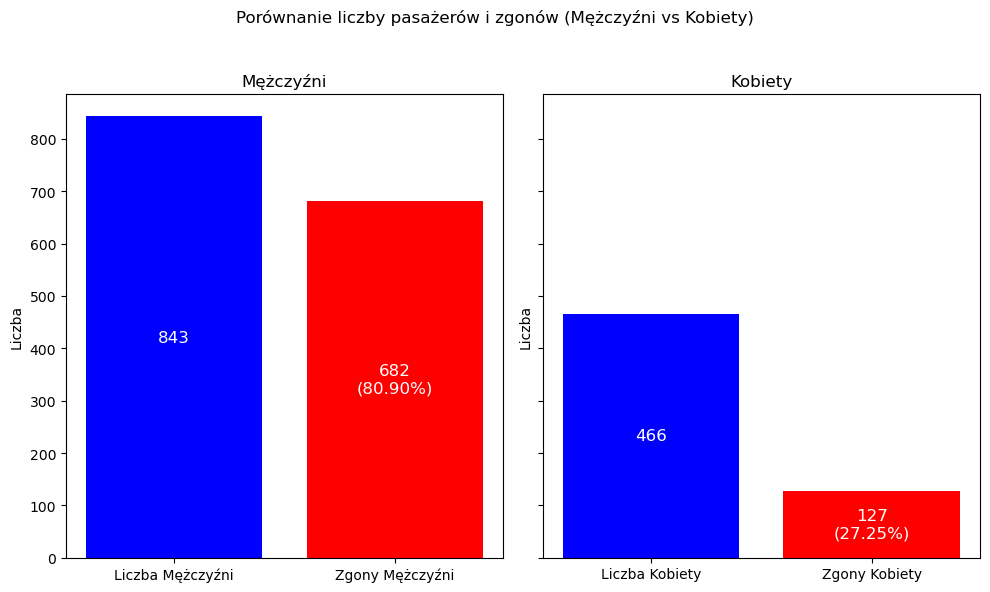

In [46]:
def plot_gender_bars(ax, gender_label, total, deaths, death_percent):
    labels = [f'Liczba {gender_label}', f'Zgony {gender_label}']
    values = [total, deaths]
    colors = ['blue', 'red']

    bars = ax.bar(labels, values, color=colors)
    for i, bar in enumerate(bars):
        yval = bar.get_height()
        if i == 1:  # drugi słupek - zgony
            ax.text(bar.get_x() + bar.get_width()/2, yval/2,
                    f'{int(yval)}\n({death_percent:.2f}%)',
                    ha='center', va='center', color='white', fontsize=12)
        else:
            ax.text(bar.get_x() + bar.get_width()/2, yval/2,
                    f'{int(yval)}',
                    ha='center', va='center', color='white', fontsize=12)
    ax.set_title(gender_label)
    ax.set_ylabel('Liczba')

# Dane
percent_death_of_men = (death_of_men / men_in_total) * 100
percent_of_women_death = (death_of_women / women_in_total) * 100

fig, ax = plt.subplots(1, 2, figsize=(10, 6), sharey=True)

plot_gender_bars(ax[0], 'Mężczyźni', men_in_total, death_of_men, percent_death_of_men)
plot_gender_bars(ax[1], 'Kobiety', women_in_total, death_of_women, percent_of_women_death)

plt.suptitle('Porównanie liczby pasażerów i zgonów (Mężczyźni vs Kobiety)')
plt.tight_layout(rect=[0, 0, 1, 0.95])  # żeby tytuł się nie zlewał z wykresem
plt.show()


### Ocenianie najstarszego, najmłodszego oraz średniej wieku pasażerów Titanic-a w celu ustanowienia przedziałów histogramu

In [47]:
age_estymate_min_max = df_eda['age'].agg(['min', 'max']).round(2)
age_estymate_mean = df_eda['age'].mean().round(2)
Markdown(f"Najmłodszy pasażer: {age_estymate_min_max['min']}lat  \nNajstarszy pasażer: {age_estymate_min_max['max']} lat  \nŚrednia wieku pasażerów: {age_estymate_mean}")

Najmłodszy pasażer: 0.17lat  
Najstarszy pasażer: 80.0 lat  
Średnia wieku pasażerów: 29.88

### Histogram dla liczby ocalałych oraz osób, które zginęły względem wieku

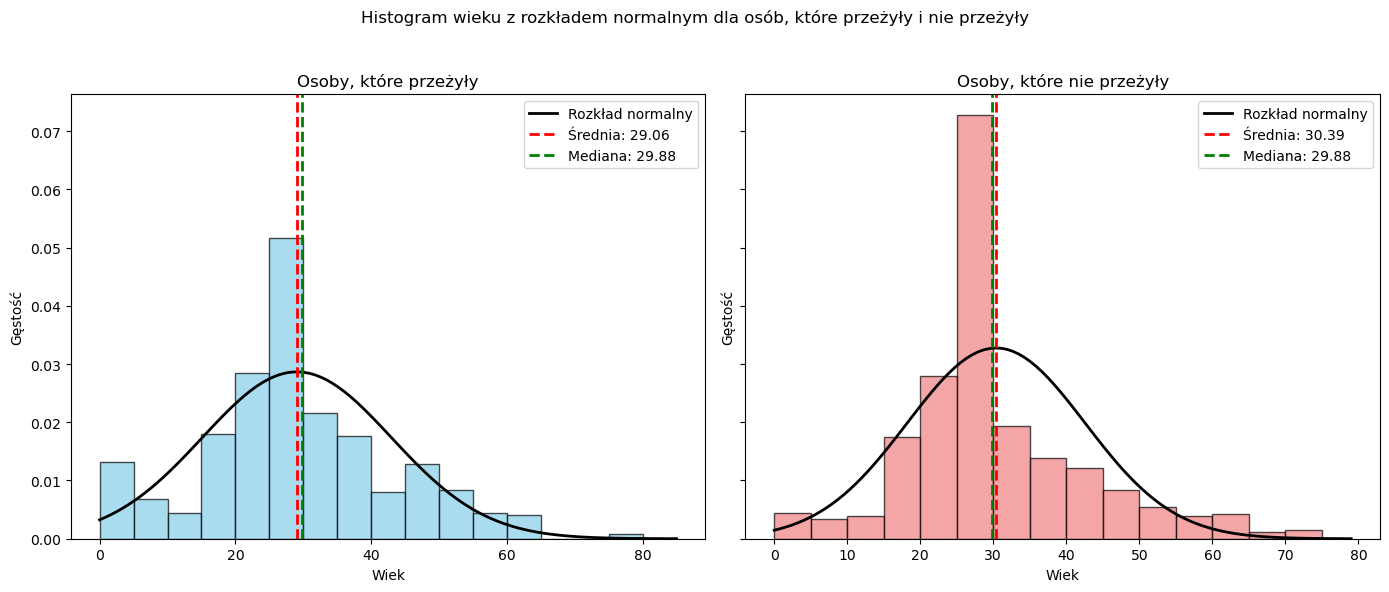

In [48]:
def plot_age_histogram(ax, data, title):
    data_clean = data.dropna()
    mean_age = data_clean.mean()
    median_age = data_clean.median()
    std_age = data_clean.std()

    max_age = int(np.ceil(data_clean.max()))
    bins = range(0, max_age + 5, 5)

    # Histogram
    ax.hist(data_clean, bins=bins, density=True, edgecolor='black', alpha=0.7, color='skyblue' if title == 'Osoby, które przeżyły' else 'lightcoral')

    # Rozkład normalny
    x = np.linspace(0, max_age + 5, 100)
    p = norm.pdf(x, mean_age, std_age)
    ax.plot(x, p, 'k', linewidth=2, label='Rozkład normalny')

    # Linie średniej i mediany
    ax.axvline(mean_age, color='red', linestyle='dashed', linewidth=2, label=f'Średnia: {mean_age:.2f}')
    ax.axvline(median_age, color='green', linestyle='dashed', linewidth=2, label=f'Mediana: {median_age:.2f}')

    ax.set_xlabel('Wiek')
    ax.set_ylabel('Gęstość')
    ax.set_title(title)
    ax.legend()

# Filtrujemy dane
survived = df_eda[df_eda['survived'] == 1]['age']
not_survived = df_eda[df_eda['survived'] == 0]['age']

fig, ax = plt.subplots(1, 2, figsize=(14, 6), sharey=True)

plot_age_histogram(ax[0], survived, 'Osoby, które przeżyły')
plot_age_histogram(ax[1], not_survived, 'Osoby, które nie przeżyły')

plt.suptitle('Histogram wieku z rozkładem normalnym dla osób, które przeżyły i nie przeżyły')
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()


In [49]:
std_age_survived = df_eda[df_eda['survived'] == 1]['age'].std()
std_age_survived_rounded = round(std_age_survived, 2)
std_age_not_survived = df_eda[df_eda['survived'] == 0]['age'].std()
std_age_not_survived_rounded = round(std_age_not_survived, 2)
Markdown(f'Odchylenie standardowe dla osób, które przeżyły: {std_age_survived_rounded}  \nOdchylenie standardowe dla osób, któe nie przeżyły: {std_age_not_survived_rounded}')

Odchylenie standardowe dla osób, które przeżyły: 13.92  
Odchylenie standardowe dla osób, któe nie przeżyły: 12.18

In [50]:
# Filtrowanie dzieci, które mają mniej niż 10 lat
children = df_eda[df_eda['age'] < 10]

# Liczba dzieci poniżej 10 roku życia
total_children = len(children)

# Liczba dzieci, które przeżyły
survived_children = children['survived'].sum()  # Suma wartości 1 w kolumnie 'survived'

# Obliczenie procentu dzieci, które przeżyły
if total_children > 0:  # Sprawdzenie, czy są jakiekolwiek dzieci w tym wieku
    survival_rate = (survived_children / total_children) * 100  # Obliczanie procentu
else:
    survival_rate = 0  # Jeśli nie ma dzieci, procent przeżycia wynosi 0%

# Wyświetlenie wyników
Markdown(f"""
**Liczba dzieci poniżej 10 roku życia:** {total_children}  
**Liczba dzieci poniżej 10 które przeżyły:** {survived_children}  
**Procent dzieci poniżej 10 które przeżyły:** {survival_rate:.2f}%
""")



**Liczba dzieci poniżej 10 roku życia:** 82  
**Liczba dzieci poniżej 10 które przeżyły:** 50.0  
**Procent dzieci poniżej 10 które przeżyły:** 60.98%


### Widzimy że wykresy są do siebie dość podobne, również odchylenia standardowe nie są zbyt różniące się od siebie.
- Może to oznaczać że katastrofa dotykała wszystkich równomiernie niezależnie od wieku
- Rzucającą się różnicą jest oczywiście liczba najmądszych pasażerów do 10 lat, która jest znacząco większa po stronie osób, które przeżyły. Oraz przedział wiekowy 25 - 30 lat. Po obu stronach najwięszy.
- W obu przypadkach można zauważyć tendencję spadkową obu wykresów dla zakresu wiekowego od 30 lat.
- Wykres dla osób, które przeżyły posiada **asymetrię lewostronnę** (kilka mniejszych wartości ściąga średnią w dół) - duży odsetek dzieci, które zostały uratowa oraz słupek wiekowy 40-45, wyraźnie niższy
- Wykres dla osób, które nie przezyły posiada **asymetrię prawostronnę** - słupek wiekowy 40-45 dużo wyższy przez słupki na prawo od meidany układają się bardziej głatko.
- Procent dzieci do 10 roku życia, które przeżyły wynisł 58.14%

### Histogram dla liczby ocalałych oraz osób, które zginęły względem wieku Do 20 lat

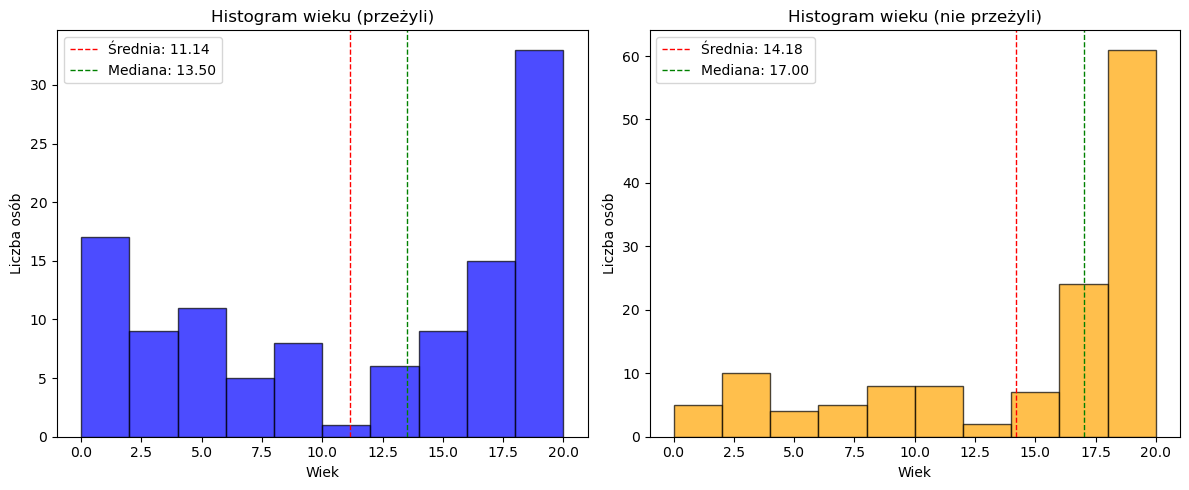


### Statystyki wieku pasażerów do 20 lat

#### Osoby, które przeżyły:
- Średnia wieku: **11.14**
- Mediana wieku: **13.50**

#### Osoby, które nie przeżyły:
- Średnia wieku: **14.18**
- Mediana wieku: **17.00**


In [51]:
# Filtracja dla osób do 20 lat
df_under_20 = df_eda[df_eda['age'] <= 20]

# Podział na przeżyli / nie przeżyli
survived_u20 = df_under_20[df_under_20['survived'] == 1]
not_survived_u20 = df_under_20[df_under_20['survived'] == 0]

# Statystyki dla przeżyłych
mean_survived = survived_u20['age'].mean()
median_survived = survived_u20['age'].median()

# Statystyki dla nieprzeżyłych
mean_not_survived = not_survived_u20['age'].mean()
median_not_survived = not_survived_u20['age'].median()

# Tworzenie wykresów
plt.figure(figsize=(12
                , 5))

# Wykres: przeżyli
plt.subplot(1, 2, 1)
plt.hist(survived_u20['age'], bins=range(0, 21, 2), color='blue', alpha=0.7, edgecolor='black')
plt.axvline(mean_survived, color='red', linestyle='dashed', linewidth=1, label=f'Średnia: {mean_survived:.2f}')
plt.axvline(median_survived, color='green', linestyle='dashed', linewidth=1, label=f'Mediana: {median_survived:.2f}')
plt.title('Histogram wieku (przeżyli)')
plt.xlabel('Wiek')
plt.ylabel('Liczba osób')
plt.legend()

# Wykres: nie przeżyli
plt.subplot(1, 2, 2)
plt.hist(not_survived_u20['age'], bins=range(0, 21, 2), color='orange', alpha=0.7, edgecolor='black')
plt.axvline(mean_not_survived, color='red', linestyle='dashed', linewidth=1, label=f'Średnia: {mean_not_survived:.2f}')
plt.axvline(median_not_survived, color='green', linestyle='dashed', linewidth=1, label=f'Mediana: {median_not_survived:.2f}')
plt.title('Histogram wieku (nie przeżyli)')
plt.xlabel('Wiek')
plt.ylabel('Liczba osób')
plt.legend()

plt.tight_layout()
plt.show()

# Markdown podsumowujący
Markdown(f"""
### Statystyki wieku pasażerów do 20 lat

#### Osoby, które przeżyły:
- Średnia wieku: **{mean_survived:.2f}**
- Mediana wieku: **{median_survived:.2f}**

#### Osoby, które nie przeżyły:
- Średnia wieku: **{mean_not_survived:.2f}**
- Mediana wieku: **{median_not_survived:.2f}**
""")


- Wykres dla osób, które przeżyły posiada dla wieku do 20 lat **asymetrię lewostronnę**
- Widać ewidętną różnicę.

### Wykres dla liczby ocalałych oraz osób, które zginęły pod względem klasy biletu

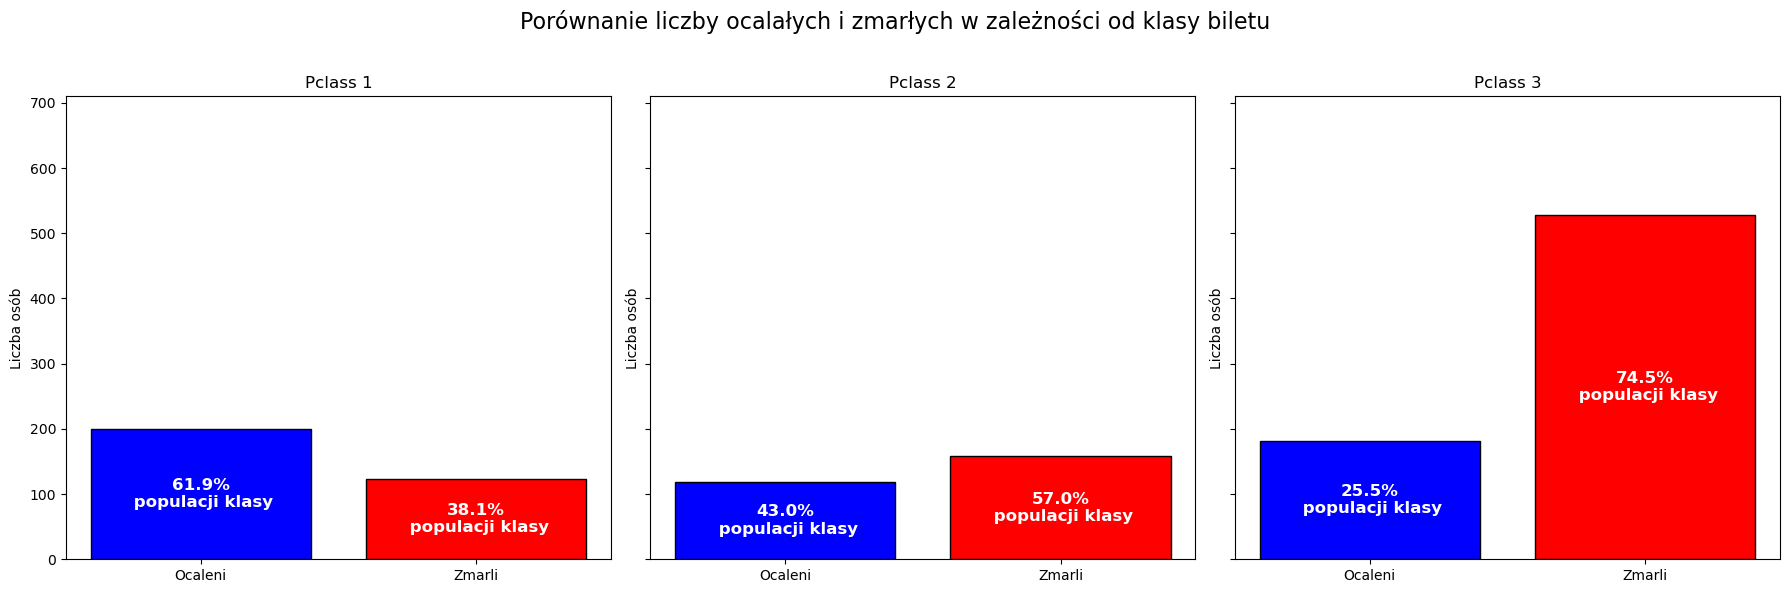

In [52]:
fig, ax = plt.subplots(1, 3, figsize=(18, 6), sharey=True)

# Iteracja przez klasy pclass
for i, pclass in enumerate([1, 2, 3]):
    # Filtrujemy dane dla danej klasy
    class_data = df_eda[df_eda['pclass'] == pclass]
    
    # Obliczanie liczby ocalałych i zmarłych
    survived_count = class_data[class_data['survived'] == 1].shape[0]
    not_survived_count = class_data[class_data['survived'] == 0].shape[0]
    total_passengers = class_data.shape[0]

    # Przygotowanie danych do wykresu
    labels = ['Ocaleni', 'Zmarli']
    values = [survived_count, not_survived_count]
    
    # Tworzenie wykresu słupkowego
    bars = ax[i].bar(labels, values, color=['blue', 'red'], edgecolor='black')
    
    # Dodanie tekstu na słupkach oraz procenty
    for bar in bars:
        yval = bar.get_height()
        percentage = (yval / total_passengers) * 100  # Obliczanie procentu
        ax[i].text(bar.get_x() + bar.get_width()/2, yval / 2, f'{percentage:.1f}%\n populacji klasy', 
                    ha='center', va='center', color='white', fontsize=12, fontweight='bold')  # Ustawienie tekstu na środku słupka
    
    # Ustawienia wykresu
    ax[i].set_title(f'Pclass {pclass}')
    ax[i].set_ylabel('Liczba osób')
    ax[i].set_ylim(0, total_passengers + 1)  # Ustawiamy oś Y
    
# Ustawienie tytułu ogólnego
plt.suptitle('Porównanie liczby ocalałych i zmarłych w zależności od klasy biletu', fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.96])  # Dostosowujemy układ
plt.show()

### Analiza odnalezionych ciał

In [53]:
#liczba odnalezionych wszyskich ciał
sum_of_body = df_eda[df_eda['body'] != 0]['body'].count()
#liczba nieodnalezionych ciał
sum_of_body_missing = df_eda[df_eda['body'] ==0]['body'].count()
#liczba odnalezionych ciał z 1 klasy
sum_of_body_first_pclass = df_eda[(df_eda['body'] != 0) & (df_eda['pclass'] == 1)]['body'].count()
#liczba odnalezionych ciał z 2 klasy
sum_of_body_second_pclass = df_eda[(df_eda['body'] != 0) & (df_eda['pclass'] == 2)]['body'].count()
#liczba odnalezionych ciał z 3 klasy
sum_of_body_third_pclass = df_eda[(df_eda['body'] != 0) & (df_eda['pclass'] == 3)]['body'].count()
#liczba odnalezionych ciał mężczyzn
sum_of_body_male = df_eda[(df_eda['body'] != 0) & (df_eda['sex'] == 'male')]['body'].count()
sum_of_body_female = df_eda[(df_eda['body'] != 0) & (df_eda['sex'] == 'female')]['body'].count()
sum_of_body_children = df_eda[(df_eda['body'] != 0) & (df_eda['age'] < 20)]['body'].count()
Markdown(f"""
### Statystyki dotyczące odnalezionych ciał

- **Suma odnalezionych ciał:** {sum_of_body}
- **Suma zaginionych ciał:** {sum_of_body_missing}

#### Podział wg klasy biletu:
- **I klasa:** {sum_of_body_first_pclass}
- **II klasa:** {sum_of_body_second_pclass}
- **III klasa:** {sum_of_body_third_pclass}

#### Podział wg płci:
- **Mężczyźni:** {sum_of_body_male}
- **Kobiety:** {sum_of_body_female}

#### Podział wg wieku:
- **Poniżej 20 roku życia:** {sum_of_body_children}
""")


### Statystyki dotyczące odnalezionych ciał

- **Suma odnalezionych ciał:** 121
- **Suma zaginionych ciał:** 1188

#### Podział wg klasy biletu:
- **I klasa:** 35
- **II klasa:** 31
- **III klasa:** 55

#### Podział wg płci:
- **Mężczyźni:** 113
- **Kobiety:** 8

#### Podział wg wieku:
- **Poniżej 20 roku życia:** 13


## Odnalezione ciała względem klasy i płci (z wartościami procentowymi)

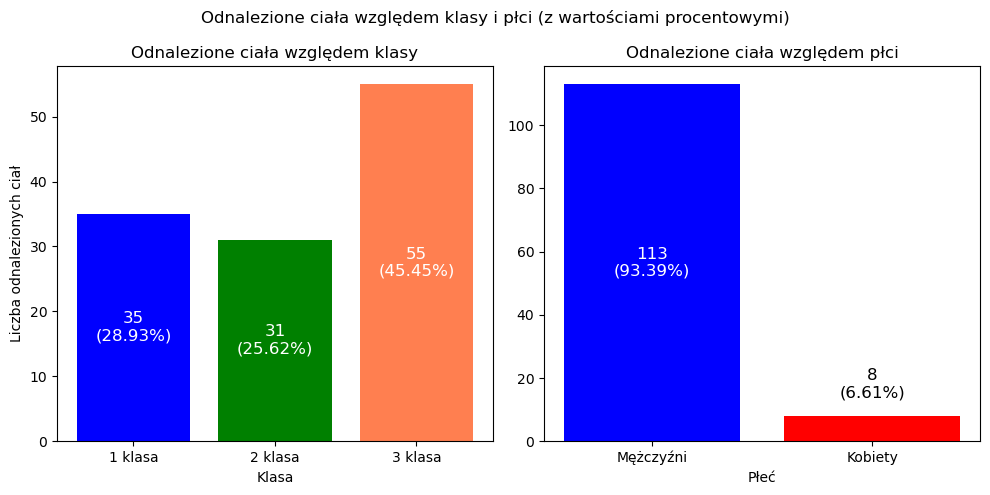

In [54]:
# Dane dotyczące odnalezionych ciał względem klasy
labels_class = ['1 klasa', '2 klasa', '3 klasa']
values_class = [sum_of_body_first_pclass, sum_of_body_second_pclass, sum_of_body_third_pclass]

# Dane dotyczące odnalezionych ciał względem płci
labels_sex = ['Mężczyźni', 'Kobiety']
values_sex = [sum_of_body_male, sum_of_body_female]

# Łączna liczba odnalezionych ciał dla klas i płci
total_bodies_class = sum_of_body_first_pclass + sum_of_body_second_pclass + sum_of_body_third_pclass
total_bodies_sex = sum_of_body_male + sum_of_body_female

# Tworzenie figure z dwoma wykresami obok siebie
fig, ax = plt.subplots(1, 2, figsize=(10, 5))

# Wykres 1: Odnalezione ciała względem klasy
bars_class = ax[0].bar(labels_class, values_class, color=['blue', 'green', 'coral'])
for bar in bars_class:
    yval = bar.get_height()  # wysokość słupka
    percent = (yval / total_bodies_class) * 100  # procent
    ax[0].text(bar.get_x() + bar.get_width()/2, yval/2, f'{int(yval)}\n({percent:.2f}%)', 
               ha='center', va='center', color='white', fontsize=12)

ax[0].set_xlabel('Klasa')
ax[0].set_ylabel('Liczba odnalezionych ciał')
ax[0].set_title('Odnalezione ciała względem klasy')

# Wykres 2: Odnalezione ciała względem płci
bars_sex = ax[1].bar(labels_sex, values_sex, color=['blue', 'red'])
for bar in bars_sex:
    yval = bar.get_height()  # wysokość słupka
    percent = (yval / total_bodies_sex) * 100  # procent
    if bar.get_x() == bars_sex[1].get_x():  # Jeśli to słupek dla kobiet
        # Umieszczamy tekst nad słupkiem
        ax[1].text(bar.get_x() + bar.get_width()/2, yval + 5, f'{int(yval)}\n({percent:.2f}%)', 
                   ha='center', va='bottom', color='black', fontsize=12)
    else:  # Słupek dla mężczyzn
        # Umieszczamy tekst na środku słupka
        ax[1].text(bar.get_x() + bar.get_width()/2, yval/2, f'{int(yval)}\n({percent:.2f}%)', 
                   ha='center', va='center', color='white', fontsize=12)

ax[1].set_xlabel('Płeć')
ax[1].set_title('Odnalezione ciała względem płci')

# Ustawienie wspólnego tytułu i dopasowanie układu
plt.suptitle('Odnalezione ciała względem klasy i płci (z wartościami procentowymi)')
plt.tight_layout()
plt.show()

### Wnioski
- Widzimy że odnalezione ciała w największej ilości należały do pasażerów klasy 3. Tyła to najliczniejsza grupa osób, które poniosły śmierć.
- Odnaleziono najwięcej ciał mężczyzn. Prawdopodobnie ze względu na mniejszą tężyznę fizyczną oraz mniejszą odporność na lodowate zimno kobiety szybciej tonęły

### 👨‍👩‍👧‍👦 Analiza pokrewieństwa pod kontem rodzeństwa, małżonków

In [55]:
#suma rodzeństwa lub małżonków na pokładzie
sum_of_sibsp = df_eda[df_eda['sibsp'] != 0]['sibsp'].count()
#suma rodziców lub potomków na pokładzie
sum_of_parch = df_eda[df_eda['parch'] != 0]['parch'].count()

#liczba małżonków lub rodzeństwa, która poniosła śmierć
sum_of_sibsp_death = df_eda[    (df_eda['sibsp'] != 0) & (df_eda['survived'] == 0)]['sibsp'].count()
#suma rodziców lub potomków na pokładzie
sum_of_sibsp_parach = df_eda[    (df_eda['parch'] != 0) & (df_eda['survived'] == 0)]['parch'].count()

Markdown(f"""
### Statystyki dotyczące więzów rodzinnych pasażerów

- **Ogólna liczba małżonków lub rodzeństwa:** {sum_of_sibsp}  
- **Liczba małżonków lub rodzeństwa, którzy ponieśli śmierć:** {sum_of_sibsp_death}  

- **Ogólna liczba rodziców lub potomków:** {sum_of_parch}  
- **Liczba rodziców lub potomków, którzy ponieśli śmierć:** {sum_of_sibsp_parach}
""")


### Statystyki dotyczące więzów rodzinnych pasażerów

- **Ogólna liczba małżonków lub rodzeństwa:** 418  
- **Liczba małżonków lub rodzeństwa, którzy ponieśli śmierć:** 227  

- **Ogólna liczba rodziców lub potomków:** 307  
- **Liczba rodziców lub potomków, którzy ponieśli śmierć:** 143


In [56]:
#Grupa z rodziną:

# liczba osób, które przeżyły oraz liczbę osób, które zmarły.

survived_with_family = df_eda[(df_eda['sibsp'] > 0) | (df_eda['parch'] > 0)]['survived'].sum()
total_with_family = df_eda[(df_eda['sibsp'] > 0) | (df_eda['parch'] > 0)].shape[0]


#Grupa bez rodziny:
survived_without_family = df_eda[(df_eda['sibsp'] == 0) & (df_eda['parch'] == 0)]['survived'].sum()
total_without_family = df_eda[(df_eda['sibsp'] == 0) & (df_eda['parch'] == 0)].shape[0]

#Obliczanie współczynników przeżycia:
survival_rate_with_family = (survived_with_family / total_with_family * 100).round(2)
survival_rate_without_family = (survived_without_family / total_without_family * 100).round(2)

Markdown(f"""
### Przeżywalność w zależności od posiadania rodziny na pokładzie

- **Liczba osób, które przeżyły i miały rodzinę:** {survived_with_family}  
- **Liczba osób, które przeżyły i nie miały rodziny:** {survived_without_family}  

#### Współczynniki przeżycia:
- **Grupy z rodziną:** {survival_rate_with_family}%  
- **Grupy bez rodziny:** {survival_rate_without_family}%
""")



### Przeżywalność w zależności od posiadania rodziny na pokładzie

- **Liczba osób, które przeżyły i miały rodzinę:** 261.0  
- **Liczba osób, które przeżyły i nie miały rodziny:** 239.0  

#### Współczynniki przeżycia:
- **Grupy z rodziną:** 50.29%  
- **Grupy bez rodziny:** 30.25%


## Współczynniki przeżycia pasażerów z rodziną i bez rodziny

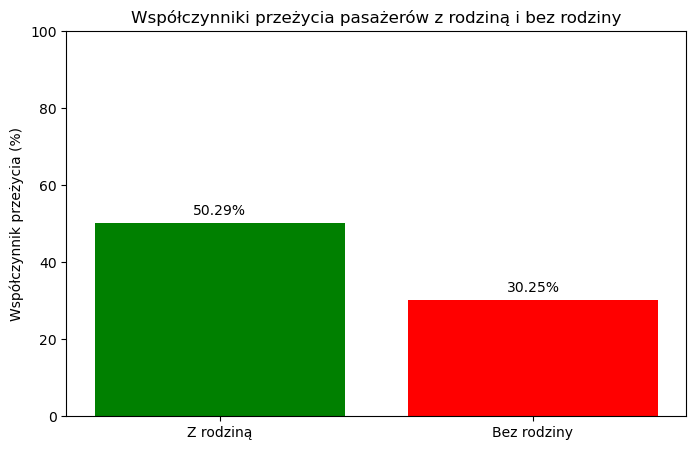

In [57]:
labels = ['Z rodziną', 'Bez rodziny']
survival_rates = [survival_rate_with_family, survival_rate_without_family]

# Ustawienia wykresu
plt.figure(figsize=(8, 5))

# Stworzenie wykresu słupkowego
bars = plt.bar(labels, survival_rates, color=['green', 'red'])  # Ustawienie kolorów bezpośrednio

# Dodanie tytułu i etykiet
plt.title('Współczynniki przeżycia pasażerów z rodziną i bez rodziny')
plt.ylabel('Współczynnik przeżycia (%)')
plt.ylim(0, 100)  # Ustawienie limitu na osi Y

# Wyświetlenie wartości na słupkach
for i, v in enumerate(survival_rates):
    plt.text(i, v + 2, f"{v:.2f}%", ha='center')

# Pokaż wykres
plt.show()

### Wykres szansy na przeżycie pasażerów pod względem posiadania członków rodziny (sibsp + parch)

#### Została dodana nowa kolumna **"family_members"** - wszyscy członkowie rodziny

### Wnioski:
- Osoby z rodziną posiadały większą szansę na przetrwanie - 50.29%
- Osoby bez rodziny - 30.25%
- Największe szanse na przeżycie pośród ocalałych miały osoby posiadające 1 do 3 członków rodziny.

### Analiza kolumny **boat**

In [58]:
total_survivors_on_boats = df_eda[df_eda['survived'] == 1]['boat'].notnull().sum()

# Wyświetlenie wyniku
Markdown(f'Łączna liczba ocalałych na łodziach: {total_survivors_on_boats}')

Łączna liczba ocalałych na łodziach: 500

In [59]:
# Filtrowanie danych, aby wykluczyć łodzie oznaczone jako "Unknown"
filtered_df = df_eda[df_eda['boat'] != 'Unknown']

# Zliczanie liczby osób w każdej łodzi ratunkowej
people_per_boat = filtered_df.groupby('boat').size()

# Obliczenie średniej liczby osób na łódź
average_people_per_boat = people_per_boat.mean()

Markdown(f'Średnia liczba osób przypadająca na jedną łódź: {average_people_per_boat:.2f}')

Średnia liczba osób przypadająca na jedną łódź: 46.75

# 🔗 KROK 4: Analiza korelacji.

### Macierz korelacji

In [60]:
correlation_matrix = df_eda.select_dtypes(include=['float64', 'int64']).corr()

# correlation_matrix

In [61]:
# # Ustawienie rozmiaru wykresu
# plt.figure(figsize=(8, 6))

# # Tworzenie wykresu heatmap z macierzy korelacji
# sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)

# # Dodanie tytułu
# plt.title('Macierz korelacji', size=16)

# # Wyświetlenie wykresu
# plt.show()

In [62]:
# # Obliczenie macierzy korelacji
# correlation_matrix = df_eda.select_dtypes(include=['float64', 'int64']).corr()

# # Utworzenie wizualizacji macierzy korelacji
# plt.figure(figsize=(8, 6))
# sns.heatmap(correlation_matrix, 
#             annot=True, 
#             cmap='coolwarm', 
#             center=0,
#             square=True,
#             # fmt='.2f',
#             cbar_kws={'shrink': 0.5}
#            )
# plt.title('Macierz korelacji zmiennych numerycznych', fontsize=16, pad=20)
# plt.tight_layout()
# plt.show()

pclass ↔ fare: -0.559


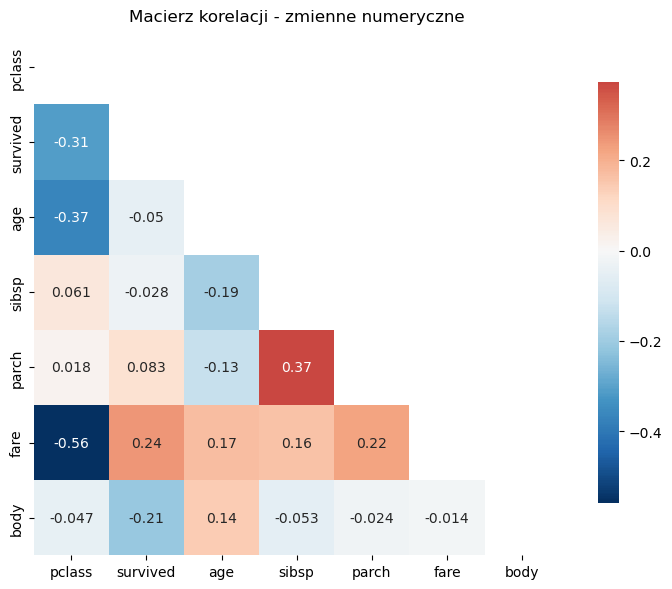

In [63]:
# Znajdowanie najsilniejszych korelacji
strong_correlations = []
for i in range(len(correlation_matrix.columns)):
    for j in range(i+1, len(correlation_matrix.columns)): # unikamy duplikacji kolumn (zeby zawsze badac rozne kolumny)
        corr_value = correlation_matrix.iloc[i, j]
        if abs(corr_value) > 0.5: # abs -> wartosc bezwzgledna
            strong_correlations.append({
                'var1': correlation_matrix.columns[i],
                'var2': correlation_matrix.columns[j],
                'correlation': corr_value
            })

strong_correlations = sorted(strong_correlations, key=lambda x: abs(x['correlation']), reverse=True)
for corr in strong_correlations[:10]:
    print(f"{corr['var1']} ↔ {corr['var2']}: {corr['correlation']:.3f}")

# Wizualizacja macierzy korelacji
plt.figure(figsize=(8, 6))
mask = np.triu(correlation_matrix)  # Maska dla górnego trójkąta
sns.heatmap(correlation_matrix, 
           annot=True, 
           cmap='RdBu_r', 
           center=0,
           square=True,
           mask=mask,
           cbar_kws={"shrink": .8})
plt.title('Macierz korelacji - zmienne numeryczne')
plt.tight_layout()
plt.show()

### Wnioski z analiza korelacji.

- Większośc korelacji jest ujemna.
1. Korelacje ujemne:
- Największa korelacja ujemna silna: -0,56 występuje mniędzy **fare**(ceną bileu) a **pclass**(klasą pasażerską)
- Korelacja ujemna średnia między **age**(wiekiem) a **pclass**(klasą psażerską): -0,31
- Korelacja ujemna średnia między **survived**(przeżyli/nieprzeżyli) a **pclass**(klasą pasażerską): -0,37
- Korelacja ujemna słaba między **survived**(przeżyli/nieprzeżyli) a **body**(odnalezionym ciałem): -0,21
- Inne korelacje ujemne są jeszcze słabsze
2. Korelacje dodatnie:
- średnia między **sibsp**(rodzeństwem lub małżonkami) **parch**(relacja dzieci rodzice): 0,37
- słaba korelacje między **survived**(przeżyli/nieprzeżyli) a **fare**(ceną bileu): 0,24 - najwięcej osób przezyło z najdroszej 1 klasy.

# 🤔 KROK 5: Alaliza wartości odstających

wartości odstające dla **fare** opłata za bilet

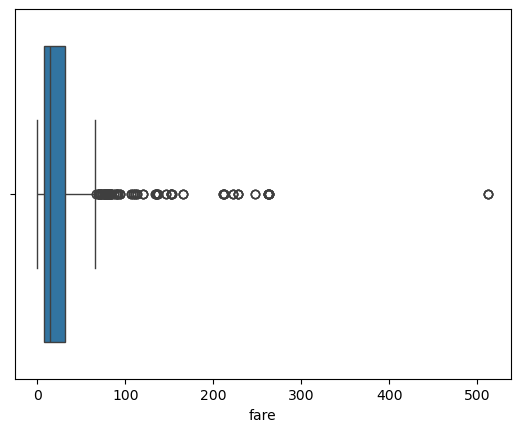

In [64]:
# Tworzenie boxplotu z zamienionymi osiami
sns.boxplot(x=df_eda['fare'])  # Użyj 'x' zamiast 'data'

# Wyświetlenie wykresu
plt.show()

In [65]:
# Oblicz kwartyle
Q1 = df_eda['fare'].quantile(0.25)
Q3 = df_eda['fare'].quantile(0.75)
IQR = Q3 - Q1

# Oblicz dolny i górny limit
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Liczenie wartości odstających
num_outliers = df_eda[(df_eda['fare'] < lower_bound) | (df_eda['fare'] > upper_bound)].shape[0]

# Wyświetlenie liczby wartości odstających
Markdown(f'Liczba wartości odstających w kolumnie "fare": {num_outliers}')


Liczba wartości odstających w kolumnie "fare": 171

In [66]:
# 1. Obliczenie kwartylów dla kolumny 'fare'
Q1 = df_eda['fare'].quantile(0.25)
Q3 = df_eda['fare'].quantile(0.75)
IQR = Q3 - Q1

# Oblicz dolny i górny limit wartości odstających
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# 2. Filtrowanie wartości nieodstających w kolumnie 'fare'
df_no_outliers = df_eda[(df_eda['fare'] >= lower_bound) & (df_eda['fare'] <= upper_bound)]

# 3. Średnia cena biletu dla pasażerów klasy 1 (pclass = 1) bez wartości odstających
mean_fare_class1_no_outliers = df_no_outliers[df_no_outliers['pclass'] == 1]['fare'].mean()

# 4. Filtrowanie wartości odstających w kolumnie 'fare'
outliers_fare = df_eda[(df_eda['fare'] < lower_bound) | (df_eda['fare'] > upper_bound)]

# 5. Wykluczenie jednej absurdalnie wysokiej wartości (najwyższej wartości odstającej)
max_fare = outliers_fare['fare'].max()
outliers_fare_excl_max = outliers_fare[outliers_fare['fare'] != max_fare]
max_outlier_fareX = outliers_fare['fare'].max()

# 6. Znalezienie najniższej i najwyższej wartości odstającej (poza najwyższą absurdalną wartością)
min_outlier_fare = outliers_fare_excl_max['fare'].min()
max_outlier_fare = outliers_fare_excl_max['fare'].max()

outlier_fare_scope = max_outlier_fare - min_outlier_fare

Markdown(f"""
### Analiza wartości odstających w kolumnie 'fare'
- **Średnia cena biletu dla klasy 1 (bez wartości odstających): {mean_fare_class1_no_outliers:.2f}**
- **Najmniejsza wartość odstająca:** {min_outlier_fare:.2f}  
- **Najwyższa wartość odstająca (poza absurdalną):** {max_outlier_fare:.2f}  
- **Zakres cenowy wartości odstających:** {outlier_fare_scope:.2f}  
- **Najwyższa wartość odstająca:** {max_outlier_fareX:.2f}
""")



### Analiza wartości odstających w kolumnie 'fare'
- **Średnia cena biletu dla klasy 1 (bez wartości odstających): 37.75**
- **Najmniejsza wartość odstająca:** 66.60  
- **Najwyższa wartość odstająca (poza absurdalną):** 263.00  
- **Zakres cenowy wartości odstających:** 196.40  
- **Najwyższa wartość odstająca:** 512.33


### Wnioski dotyczące can biletów:
- ostanią wartość 512.33 można odrzucić jako błąd - cena wydaje się absurdalna jako jedna
- Zakrs cenowy wartości odstających: 196.40
- Wartości odstające mogą się wydawać dodatkową opłatą za luksusowe usługi bądź udogodnienia materialne: szampan, kawior etc.

### Wartości odstające dla **age** - wiek pasażerów

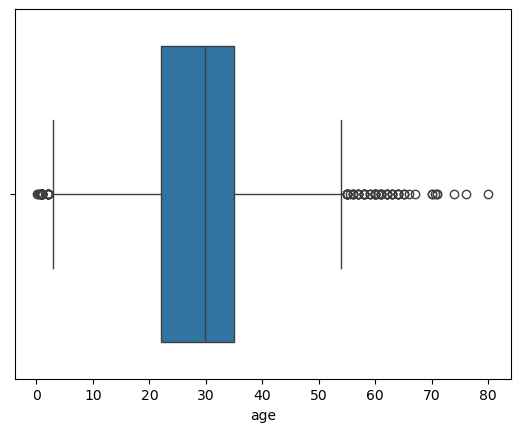

In [67]:
# Tworzenie boxplotu z zamienionymi osiami
sns.boxplot(x=df_eda['age'])  # Użyj 'x' zamiast 'data'

# Wyświetlenie wykresu
plt.show()

### Liczba wartości odstających minimalnych i  maksymalnych w kolumnie 'age

In [68]:
# Oblicz kwartyle
Q1 = df_eda['age'].quantile(0.25)
Q3 = df_eda['age'].quantile(0.75)
IQR = Q3 - Q1

# Oblicz dolny i górny limit
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Zliczanie wartości odstających minimalnych (poniżej dolnego limitu)
outliers_min = df_eda[df_eda['age'] < lower_bound]
num_outliers_min = outliers_min.shape[0]

# Zliczanie wartości odstających maksymalnych (powyżej górnego limitu)
outliers_max = df_eda[df_eda['age'] > upper_bound]
num_outliers_max = outliers_max.shape[0]

# Zliczanie osobników z wiekiem 0
num_age_zero = df_eda[df_eda['age'] == 0].shape[0]

# Największa wartość z minimalnych wartości odstających
max_outlier_min = outliers_min['age'].max() if num_outliers_min > 0 else None

# Najmniejsza wartość z maksymalnych wartości odstających
min_outlier_max = outliers_max['age'].min() if num_outliers_max > 0 else None

# Wyświetlenie wyników
Markdown(f"""
### Analiza wartości odstających w kolumnie `age`

- **Liczba wartości odstających minimalnych:** {num_outliers_min}  
- **Liczba wartości odstających maksymalnych:** {num_outliers_max}  
- **Liczba osobników z wiekiem 0:** {num_age_zero}  
- **Największa wartość z minimalnych odstających:** {max_outlier_min}  
- **Najmniejsza wartość z maksymalnych odstających:** {min_outlier_max}
""")



### Analiza wartości odstających w kolumnie `age`

- **Liczba wartości odstających minimalnych:** 34  
- **Liczba wartości odstających maksymalnych:** 67  
- **Liczba osobników z wiekiem 0:** 0  
- **Największa wartość z minimalnych odstających:** 2.0  
- **Najmniejsza wartość z maksymalnych odstających:** 55.0


Wartości odstające względem wieku świadczą o tym że prawdopodobnie istaniało 34 osób w wiku niemowlęcym poniżej 2 lat oraz 67 osób powyżej 55 roku życia.

### Wartości odstające dla **sibsp** - rodzeństwo lub małżeństwo

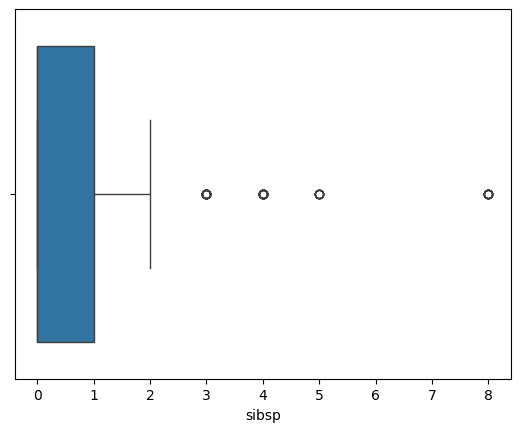

In [69]:
sns.boxplot(x=df_eda['sibsp']) 

# Wyświetlenie wykresu
plt.show()

In [70]:
sibsp_counts = df['sibsp'].value_counts().sort_index()

Markdown(f"""
### Liczba przypadków dla poszczególnych wartości w kolumnie `sibsp`

{sibsp_counts.to_frame().to_markdown()}
""")


### Liczba przypadków dla poszczególnych wartości w kolumnie `sibsp`

|   sibsp |   count |
|--------:|--------:|
|       0 |     891 |
|       1 |     319 |
|       2 |      42 |
|       3 |      20 |
|       4 |      22 |
|       5 |       6 |
|       8 |       9 |


### Bardzo ciekawy wykres wskazujący że 75% popilacji nieposiadało lub posiadało 1 rodzeństwo.

In [71]:
# Oblicz kwartyle
Q1_s = df_eda['sibsp'].quantile(0.25)
Q3_s = df_eda['sibsp'].quantile(0.75)
IQR_s = Q3_s - Q1_s

# Oblicz dolny i górny limit
lower_bound = Q1_s - 1.5 * IQR_s
upper_bound = Q3_s + 1.5 * IQR_s

# Zliczanie wartości odstających
outliers_sibsp_s = df_eda[(df_eda['sibsp'] < lower_bound) | (df_eda['sibsp'] > upper_bound)]

# Liczenie wartości odstających
num_outliers_sibsp = outliers_sibsp_s.shape[0]
Markdown(f'Istniało {num_outliers_sibsp} osób, któe posiadały wiecej niż 2 rodzeństa')

Istniało 57 osób, któe posiadały wiecej niż 2 rodzeństa

### Konkretne wartości i ich liczba

In [72]:
# Oblicz kwartyle
Q1_s_value_counts = df_eda['sibsp'].quantile(0.25)
Q3_s_value_counts = df_eda['sibsp'].quantile(0.75)
IQR_s_value_counts = Q3_s_value_counts - Q1_s_value_counts

# Oblicz dolny i górny limit
lower_bound = Q1_s_value_counts - 1.5 * IQR_s_value_counts
upper_bound = Q3_s_value_counts + 1.5 * IQR_s_value_counts

# Zliczanie wartości odstających
outliers_sibsp_value_counts = df_eda[(df_eda['sibsp'] < lower_bound) | (df_eda['sibsp'] > upper_bound)]

# Liczenie wartości odstających
num_outliers_sibsp_value_counts = outliers_sibsp_value_counts.shape[0]

# Liczenie unikalnych wartości odstających i ich liczby wystąpień
outlier_counts__sibsp_value_counts = outliers_sibsp_value_counts['sibsp'].value_counts()

# Wyświetlenie wyników
Markdown(f"""
### Wartości odstające w kolumnie `sibsp`

- Liczba wartości odstających: **{num_outliers_sibsp_value_counts}**

#### Szczegóły wartości odstających i ich liczba wystąpień:
{outlier_counts__sibsp_value_counts.to_frame().to_markdown()}
""")




### Wartości odstające w kolumnie `sibsp`

- Liczba wartości odstających: **57**

#### Szczegóły wartości odstających i ich liczba wystąpień:
|   sibsp |   count |
|--------:|--------:|
|       4 |      22 |
|       3 |      20 |
|       8 |       9 |
|       5 |       6 |


### Wartości odstające dla **parch** - rodzeństwo lub małżeństwo

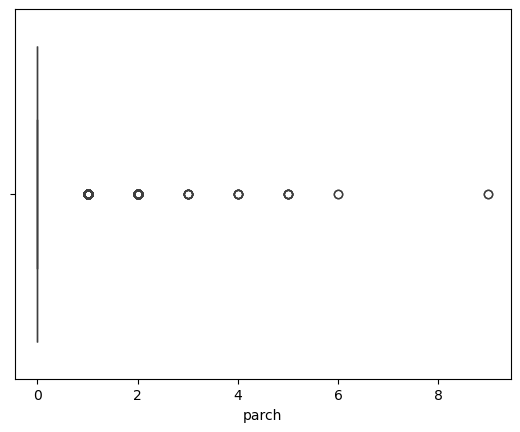

In [73]:
sns.boxplot(x=df_eda['parch'])  # Użyj 'x' zamiast 'data'

# Wyświetlenie wykresu
plt.show()

In [74]:
Q1_p = df_eda['sibsp'].quantile(0.25)
Q3_p = df_eda['sibsp'].quantile(0.75)
IQR_p = Q3_p - Q1_p

# Oblicz dolny i górny limit
lower_bound = Q1_p - 1.5 * IQR_p
upper_bound = Q3_p + 1.5 * IQR_p

# Zliczanie wartości odstających
outliers_parch = df_eda[(df_eda['parch'] < lower_bound) | (df_eda['parch'] > upper_bound)]

# Liczenie wartości odstających
num_outliers_parch = outliers_parch.shape[0]
Markdown(f'Istniało {num_outliers_parch} osób, któe posiadały wiecej niż 2 konotacji rodzic - potomek')

Istniało 24 osób, któe posiadały wiecej niż 2 konotacji rodzic - potomek

In [75]:
# Oblicz kwartyle
Q1_p_value_counts = df_eda['sibsp'].quantile(0.25)
Q3_p_value_counts = df_eda['sibsp'].quantile(0.75)
IQR_p_value_counts = Q3_p_value_counts - Q1_p_value_counts

# Oblicz dolny i górny limit
lower_bound = Q1_p_value_counts - 1.5 * IQR_p_value_counts
upper_bound = Q3_p_value_counts + 1.5 * IQR_p_value_counts

# Zliczanie wartości odstających
outliers_parch_value_counts = df_eda[(df_eda['parch'] < lower_bound) | (df_eda['parch'] > upper_bound)]

# Liczenie wartości odstających
num_outliers_parch_value_counts = outliers_parch_value_counts.shape[0]

# Liczenie unikalnych wartości odstających i ich liczby wystąpień
outlier_counts__parch_value_counts = outliers_parch_value_counts['parch'].value_counts()

# Wyświetlenie wyników
Markdown(f"""
### Wartości odstające w kolumnie `parch`

- Liczba wartości odstających: **{num_outliers_parch_value_counts}**

#### Szczegóły wartości odstających i ich liczba wystąpień:
{outlier_counts__parch_value_counts.to_frame().to_markdown()}
""")


### Wartości odstające w kolumnie `parch`

- Liczba wartości odstających: **24**

#### Szczegóły wartości odstających i ich liczba wystąpień:
|   parch |   count |
|--------:|--------:|
|       3 |       8 |
|       4 |       6 |
|       5 |       6 |
|       6 |       2 |
|       9 |       2 |


# 🧠 Podsumowanie analizy

## KROK 1: Ogólny przegląd danych:

- Liczba kolumn: 14
- Liczba wierszy (indexów): 1310
- Typy poszczególnych wierszy to zmienno przecinkowy: float64(7), oraz tekstowy: object(7)
- Liczba wartości unkatowe :3343
- Już na wczesnym etapie można było zauważyć barakujące dane
- Liczba wszystkich brakujących wartości: 3869
- Wśród klasy biletu przeważa 3 klasa biletu.
- Większość osób jest tóż przed 30 rokiem zycia.

## KROK 2: Analiza brakujących wartości.
#### Krok został scalony z jednoczesną **Transformacją danych**
- Liczba wszystkich brakujących wartości: 3869
- Brak duplikatów
- Każda kolumna zawierała przynajmniej jedną brakującą wartość.
- Usunięto 1 wiesz, który nie posiadał żadnej wartości poza NAN
- W każdej kolumnie wartości NAN zostały zastąpione tym samym rodzajem wartości.

### Podjęte działania
- **Wartości zostały naprawione znanymi mi metodami naprawy:**
- Kolumna **"age"** - wypełnienie brakujących wartości **śrdnią wartością**
- Kolumna **fare** (cena biletu) - brak 1 wartości w 3 klasie wypełnione **śrdnią wartością ceny biletu z 3 klasy**
- Kolumna **cabin** (numer kabiny) - 1014 brakujących wartości zostało zastąpionych wartością **"Unknown"** - ta kolumna nie została przeze mnie do końca przeanalizowana
- Kolumna **embarked** (Port, w którym pasażer wszedł na pokład) - zostały zastąpione najbardziej możliwością **S - Southampton**
- Kolumna **boat** (numerze łodzi ratunkowej) - Zastąpienie NaN stringiem **'Unkown'** jako że typ kolumny to **<object>** a jednocześnie widzimy że numery łodzi zawierały litery
- Kolumna **home.dest** (destynacji pasażerów) - zastąpienie wartości brakujących tym razem **"Dest. unkonw"**.
- Kolumna **body** (numer odnalezionego ciała) - Postanowiłem nadać każedmu nieodnalezionemu wartość liczbową **"0"**.

# KROK 3: Analiza pojedyńczych zmiennych

Analiza kolumny **home.dest** została przemnie pominięta. Uznałem ją za niepotrzebną

**Została utworzona kopia dataframu o nazwie df_eda w celu ochrony surówki danych**
## Analiza zgonów:
- Całkowita liczba pasażerów: 1309
- Całkowita liczba zgonów: 809
- Całkowita Całkowity procent zgonów: 61.8%

## Analiza zgonów podług płci:

**Mężczyźni:**
- Całkowita liczba mężczyzn na pokładzie: 843
- Liczba zgonów mężczyzn: 682
- Odsetek populacji męskiej, która zginęła wyniósł 80.9%

**Kobiety:**
- Całkowita liczba kobiet na pokładzie: 466
- Liczba zgonów kobiet: 127
- Odsetek populacji żeńskiej która zginęła wyniósł 27.25%.

Widzimy że odsetek kobiet, które zginęły jest mniejszy niż w przypadku mężczyzn, mimo że ich mniejsze liczby. Prawdopodobnie były chronione przez mężczyzn przed śmiercią mimo iż stanowiły 35,6% całkowitej liczby pasażerów

Katastrofa dotykała wszystkich równomiernie niezależnie od wieku.

### Przeżywalnośc dzieci do 10 roku życia.

- Mimo iż rokzkład śmiertelońci rozkładał się równomiernie odsetek przeżywalności dla dzieci poniżej 10 roku życia wyniósł 58,14%. Może świadczyć to o tym że dzieci podczas katastrofy były chronione i ułatwiano im przeżywalność


### Największy odsetek przeżywalności pod względem klasy biletu

Największy odsetek przeżywalności pod względem klasy biletu posiadała klasa 1 - 61,9%.
Następnie 2 klasa - 43%
Oraz najmniejszy odsetek posiadała klasa 3 - 25.5%.

### Odnalezione ciała:
Suma zaginionych ciał: 1188
Łączna liczba ciał 121
Odnaleziono zaledwie 8 ciał kobiet co stanowi 6,61% wszystkich ciał. Może świadczyć to o tym że kobiety, topiły się szybciej ze względu na mniejszą tężyznę fizyczną.

### Pokrewieństwo pasażerów:
Ogólna liczba małżonków lub rodzeństwa: 418
Ogólna liczba małżonków lub rodzeństwa, która poniosła śmierć: 227
Ogólna liczba rodziców lub potomków: 307
Ogólna liczba rodziców lub potomkówa, która poniosła śmierć: 143

Szansa na przeżycie wzrastała wraz z posiadaniem członków rodziny. Osoby z rodziną posiadały: 50.29% szansy na przeżycie. Osoby samotne zaledwie: 30,25%.
Największe szanse na przeżycie pośród ocalałych miały osoby posiadające 1 do 3 członków rodziny.

W łodziach ratunkowych znajdowało się średnio 46.75 osoby

### KROK 4: Analiza korelacji.

Poza ujemną korelacją między **fare**(opłatą) a **pclass**(klasą biletu) wynoszącą -0,56, nie można stwierdzić jakichkolwiek znaczących kolrelacj.

### KROK 5: Alaliza wartości odstających

Istniało przynajmniej 170 osób, które zapłaciły dużo więcej niż średnia cana biletu 1 klasy. Jeat prawdopodobne że ktoś dopłacił za dodatkowe usługi

Istniało 101 osób, których wiek odstawał od wieku reszty pasażerów w tym: 34 dzieci i niemowląt oraz 67 osób starszych.7

Istniało 57 osób, które miało 3 rodzeństwa bądz więcej